In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


1. Data Preparation:

○ Access the StatsBomb Open Data repository..
○ Locate the FA Women's Super League dataset using competitions.json.
○ Extract player-level data from events/<match_id>.json and aggregate it into a dataset of
performance metrics relevant for scouting.

2. Talent Scouting Analysis or Modeling:

○ Develop a model or analysis to identify high-potential players for recruitment. Be
creative in your approach, choosing metrics and methods that align with scouting goals. If
modeling, split data into training and testing sets and evaluate with a suitable metric.
Deliver clear, actionable insights for recommending players.

3. Submission: Submit a Jupyter notebook as PDF or HTML (how to linked below) and relevant
source code files containing:

○ Code to load and process the StatsBomb FA Women's Super League data into a
player-level dataset for scouting.

○ Your model or analysis, including visualizations or results that identify high-potential
players.

○ A brief explanation (100–200 words) addressing:

■ What player performance metrics did you choose, and why are they relevant for
scouting talent?

■ What insights did your model or analysis reveal about potential players for
recruitment?

■ What are the limitations of your approach?

4. Tools:

○ Use Python with libraries like pandas, scikit-learn, matplotlib, or seaborn.


In [2]:
df_18 = pd.read_parquet('/Users/amitmishra/wsl_data/data/df_18.parquet')

In [3]:
df_18.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,counterpress,dribble_nutmeg,dribble_outcome,...,shot_saved_off_target,goalkeeper_shot_saved_to_post,shot_saved_to_post,goalkeeper_lost_in_play,goalkeeper_success_out,shot_follows_dribble,goalkeeper_success_in_play,half_start_late_video_start,half_end_early_video_end,goalkeeper_saved_to_post
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [4]:
attacking_positions = [
    'Center Forward',
    'Left Center Forward', 
    'Right Center Forward',
    'Secondary Striker'
]

In [5]:
df_18 = df_18[(df_18['position'].isin(attacking_positions))]

In [21]:
# Aggregation step; adding KPIs to scout a striker

stats_18 = df_18.groupby(['player_id', 'player']).agg({
    'match_id': 'nunique', 
    'team': 'first',
    'shot_outcome': lambda x: (x == 'Goal').sum(),      # for counting goals scored by each player
    'shot_statsbomb_xg': 'sum',
    'shot_one_on_one': lambda x: (x == True).sum(),     # one-v-one situation (for strikers making off the ball runs, movement)
    'pass_through_ball': lambda x: (x == True).sum(),   # for through passess (progression capability)
    'pass_goal_assist': lambda x: (x == True).sum(),    # for assists
    'dribble_outcome': lambda x: (x=='Complete').sum(),
    'pass_shot_assist': lambda x: (x == True).sum(),    # for key passes (Link-up play)
    'counterpress':lambda x: (x==True).sum(),           # if the striker pressed (differentiator)
    'duel_outcome': lambda x: (x == 'Won').sum(),       # physical battles won (differentiator)
    
})

In [22]:
stats_18 = stats_18.rename(columns={'shot_outcome': 'goals',
                   'shot_statsbomb_xg':'xG', 
                   'match_id':'mtchs_pld',
                   'duel_outcome':'duels_won',
                   'pass_through_ball':'through_balls',
                   'pass_goal_assist':'assists',
                   'dribble_outcome':'completed_dribbles',
                   'pass_shot_assist':'key_passes',
                   'shot_one_on_one':'1vs1'})

In [23]:
stats_18 = stats_18.reset_index()

In [24]:
stats_18.describe()

,player_id,mtchs_pld,goals,xG,1vs1,through_balls,assists,completed_dribbles,key_passes,counterpress,duels_won
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,15576.471264,4.850575,1.160920,1.219724,0.954023,0.770115,0.482759,4.597701,3.367816,19.931034,1.229885
std,5071.896833,4.525198,3.007253,2.682826,2.256299,1.582617,1.354253,6.784832,4.856343,26.227446,1.998262
min,4638.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15554.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,15708.000000,3.000000,0.000000,0.217012,0.000000,0.000000,0.000000,2.000000,2.000000,10.000000,0.000000
75%,18205.000000,6.500000,1.000000,1.164404,1.000000,1.000000,0.000000,5.000000,5.000000,26.000000,1.500000
max,24747.000000,20.000000,21.000000,17.526108,13.000000,7.000000,10.000000,39.000000,26.000000,130.000000,11.000000


In [25]:
# filger out players who've played more than 3 games

stats_18 = stats_18[stats_18['mtchs_pld'] > 3]

In [26]:
stats_18.head()

,player_id,player,mtchs_pld,team,goals,xG,1vs1,through_balls,assists,completed_dribbles,key_passes,counterpress,duels_won
1,4641.0,Francesca Kirby,12,Chelsea FCW,4,5.925652,2,1,0,17,21,36,1
2,4643.0,Georgia Stanway,4,Manchester City WFC,1,1.533888,1,0,0,11,3,17,1
4,4650.0,Nadia Nadim,4,Manchester City WFC,0,1.219117,0,0,0,5,3,22,0
5,4653.0,Jane Ross,19,West Ham United LFC,6,6.622918,4,7,2,22,15,104,5
6,4654.0,Nikita Parris,15,Manchester City WFC,14,14.235290,13,4,5,25,12,123,4


#### Checking for correlation after selecting features. We'll drop features that are highly correlated to get more accurate results

In [27]:
# Initial columns selected below

metric_cols = ['goals', 'xG' ,'1vs1','through_balls','assists'	,'key_passes','counterpress','duels_won','completed_dribbles']

In [28]:
correlation_matrix = stats_18[metric_cols].corr()
correlation_matrix

,goals,xG,1vs1,through_balls,assists,key_passes,counterpress,duels_won,completed_dribbles
goals,1.000000,0.969185,0.824928,0.584495,0.807564,0.720134,0.809445,0.267525,0.732347
xG,0.969185,1.000000,0.879834,0.596720,0.779807,0.751183,0.860011,0.343455,0.773162
1vs1,0.824928,0.879834,1.000000,0.574822,0.680844,0.657361,0.804448,0.360379,0.707984
through_balls,0.584495,0.596720,0.574822,1.000000,0.601172,0.614813,0.643104,0.313910,0.574814
assists,0.807564,0.779807,0.680844,0.601172,1.000000,0.616481,0.652408,0.245815,0.731099
key_passes,0.720134,0.751183,0.657361,0.614813,0.616481,1.000000,0.700804,0.288563,0.806906
counterpress,0.809445,0.860011,0.804448,0.643104,0.652408,0.700804,1.000000,0.565658,0.832533
duels_won,0.267525,0.343455,0.360379,0.313910,0.245815,0.288563,0.565658,1.000000,0.484301
completed_dribbles,0.732347,0.773162,0.707984,0.574814,0.731099,0.806906,0.832533,0.484301,1.000000


#### Based on the correlation matrix, we will drop xG since it is highly correlated to goals. We will instead include finishing efficiency that calculates: Goals - xG

In [29]:
# Calculate new metric finishing_efficiency

stats_18['finishing_efficiency'] = stats_18['goals'] - stats_18['xG']

In [30]:
# Check corrleation matrix to see any more significantly correlated features

metric_cols_new = ['goals','1vs1','through_balls','assists','key_passes','duels_won','completed_dribbles','finishing_efficiency']

correlation_matrix_new = stats_18[metric_cols_new].corr()
correlation_matrix_new

,goals,1vs1,through_balls,assists,key_passes,duels_won,completed_dribbles,finishing_efficiency
goals,1.000000,0.824928,0.584495,0.807564,0.720134,0.267525,0.732347,0.592939
1vs1,0.824928,1.000000,0.574822,0.680844,0.657361,0.360379,0.707984,0.226552
through_balls,0.584495,0.574822,1.000000,0.601172,0.614813,0.313910,0.574814,0.247730
assists,0.807564,0.680844,0.601172,1.000000,0.616481,0.245815,0.731099,0.488226
key_passes,0.720134,0.657361,0.614813,0.616481,1.000000,0.288563,0.806906,0.252957
duels_won,0.267525,0.360379,0.313910,0.245815,0.288563,1.000000,0.484301,-0.116533
completed_dribbles,0.732347,0.707984,0.574814,0.731099,0.806906,0.484301,1.000000,0.227045
finishing_efficiency,0.592939,0.226552,0.247730,0.488226,0.252957,-0.116533,0.227045,1.000000


In [44]:
# Final features used in clustering (dropped features: counterpress, xG)

final_df = stats_18[['player_id', 'player', 'mtchs_pld', 'team']].copy() #We'll add more features to this df later
final_features = ['goals','1vs1','through_balls','assists','key_passes','duels_won','completed_dribbles','finishing_efficiency']

In [55]:
stats_18.head()

,player_id,player,mtchs_pld,team,goals,xG,1vs1,through_balls,assists,completed_dribbles,key_passes,counterpress,duels_won,finishing_efficiency
1,4641.0,Francesca Kirby,12,Chelsea FCW,4,5.925652,2,1,0,17,21,36,1,-1.925652
2,4643.0,Georgia Stanway,4,Manchester City WFC,1,1.533888,1,0,0,11,3,17,1,-0.533888
4,4650.0,Nadia Nadim,4,Manchester City WFC,0,1.219117,0,0,0,5,3,22,0,-1.219117
5,4653.0,Jane Ross,19,West Ham United LFC,6,6.622918,4,7,2,22,15,104,5,-0.622918
6,4654.0,Nikita Parris,15,Manchester City WFC,14,14.235290,13,4,5,25,12,123,4,-0.235290


In [56]:
# Convert all features everything to per-game rates on stats_18 dataframe

numeric_cols = stats_18.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop(['player_id','mtchs_pld','finishing_efficiency'])

for col in numeric_cols:
    stats_18[f'{col}_per90'] = stats_18[col] / stats_18['mtchs_pld']



In [60]:
clustering_cols = ['goals_per90', '1vs1_per90', 'through_balls_per90', 'assists_per90', 
                 'key_passes_per90', 'duels_won_per90', 'completed_dribbles_per90', 
                 'finishing_efficiency']

In [63]:
for col in clustering_cols:
    final_df[col] = stats_18[col]

In [64]:
final_df.head()

,player_id,player,mtchs_pld,team,goals_per90,1vs1_per90,through_balls_per90,assists_per90,key_passes_per90,duels_won_per90,completed_dribbles_per90,finishing_efficiency
1,4641.0,Francesca Kirby,12,Chelsea FCW,0.333333,0.166667,0.083333,0.000000,1.750000,0.083333,1.416667,-1.925652
2,4643.0,Georgia Stanway,4,Manchester City WFC,0.250000,0.250000,0.000000,0.000000,0.750000,0.250000,2.750000,-0.533888
4,4650.0,Nadia Nadim,4,Manchester City WFC,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.250000,-1.219117
5,4653.0,Jane Ross,19,West Ham United LFC,0.315789,0.210526,0.368421,0.105263,0.789474,0.263158,1.157895,-0.622918
6,4654.0,Nikita Parris,15,Manchester City WFC,0.933333,0.866667,0.266667,0.333333,0.800000,0.266667,1.666667,-0.235290


In [66]:
clustering_data = final_df[clustering_cols]

### Clustering

In [67]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Run KMeans clustering

kmeans = KMeans(n_clusters=2, random_state=42)
final_df['cluster'] = kmeans.fit_predict(scaled_data)



In [68]:
# check cluster distribution

print(f'{final_df['cluster'].value_counts()}')

cluster
0    29
1    12
Name: count, dtype: int64


In [83]:
# Calculate cluster means
cluster_means = final_df.groupby('cluster')[clustering_cols].mean()

# Get ranges for scaling (min/max for each metric)
ranges = [(final_df[col].min(), final_df[col].max()) for col in clustering_cols]

# Make variable names more readable for the radar chart
readable_labels = [
    "Goals\nper 90", "1v1s\nper 90", "Through Balls\nper 90", "Assists\nper 90",
    "Key Passes\nper 90", "Duels Won\nper 90", "Completed\nDribbles per 90",
    "Finishing\nEfficiency"
]

# Print cluster distribution
print("Cluster distribution:")
print(final_df['cluster'].value_counts())

Cluster distribution:
cluster
0    29
1    12
Name: count, dtype: int64


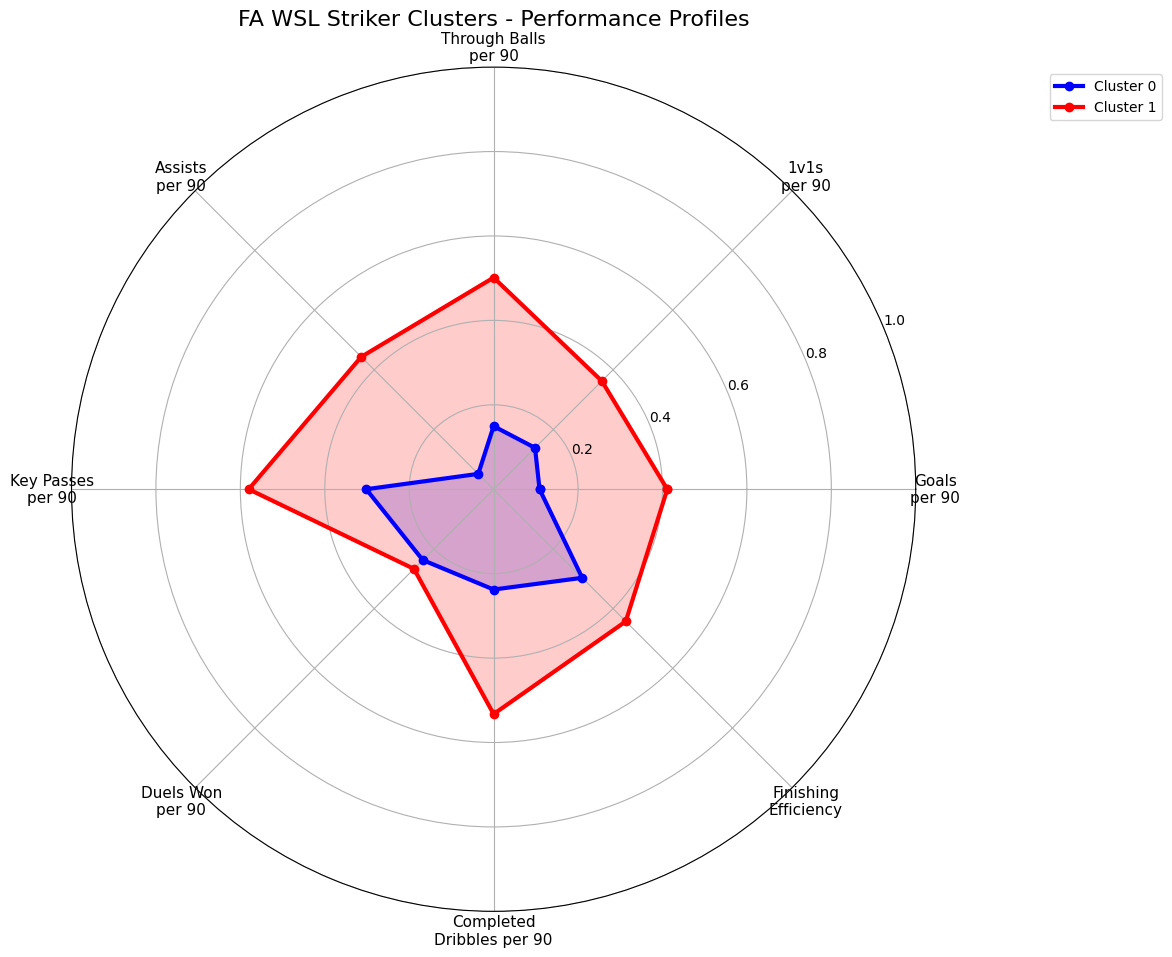

In [84]:
def create_striker_radar(cluster_means, variables, ranges):
    # Calculate angles for each variable
    angles = np.linspace(0, 2*np.pi, len(variables), endpoint=False).tolist()
    angles += angles[:1]  # Close the loop
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
    
    # Colors and labels
    colors = ['blue', 'red']
    cluster_labels = ['Cluster 0', 'Cluster 1']
    
    # Plot each cluster
    for i, cluster_id in enumerate([0, 1]):
        values = cluster_means.loc[cluster_id].values.tolist()
        
        # Scale values between 0 and 1 for better visualization
        scaled_values = []
        for j, val in enumerate(values):
            range_min, range_max = ranges[j]
            if range_max == range_min:  # Handle edge case
                scaled_val = 0.5
            else:
                scaled_val = (val - range_min) / (range_max - range_min)
            scaled_values.append(scaled_val)
        
        scaled_values += scaled_values[:1]  # Close the loop
        
        ax.plot(angles, scaled_values, 'o-', linewidth=3, label=cluster_labels[i], color=colors[i])
        ax.fill(angles, scaled_values, alpha=0.2, color=colors[i])
    
    # Customize
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables, size=11)
    ax.set_ylim(0, 1)
    ax.set_title('FA WSL Striker Clusters - Performance Profiles', size=16, pad=30)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    ax.grid(True)
    
    return fig, ax

# Create the radar plot
fig, ax = create_striker_radar(cluster_means, readable_labels, ranges)
plt.tight_layout()
plt.show()

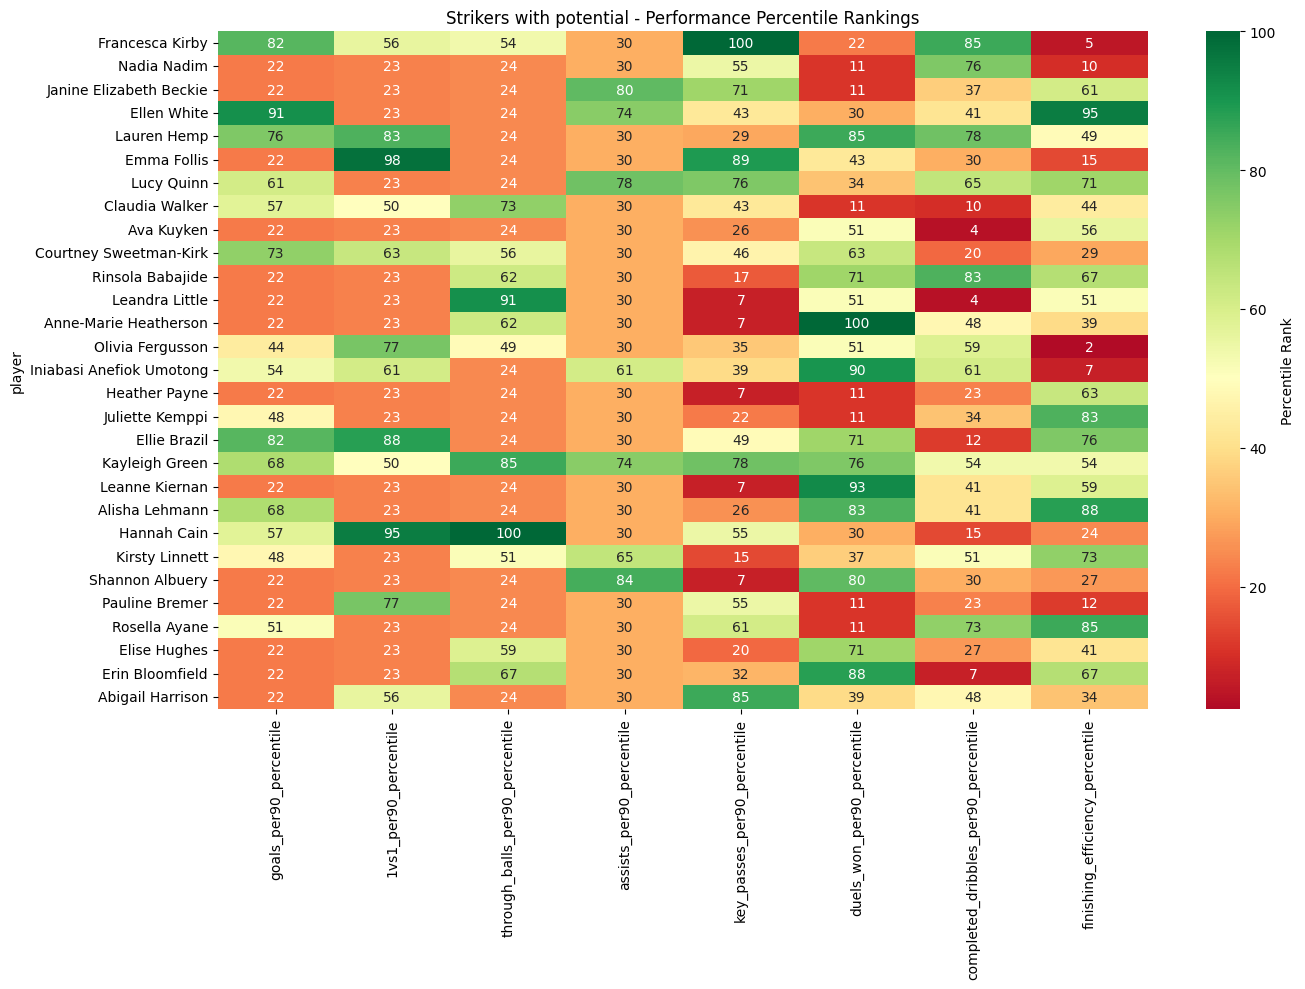

In [93]:
# Calculate percentiles for ALL clustering metrics
clustering_cols = ['goals_per90', '1vs1_per90', 'through_balls_per90', 'assists_per90', 
                  'key_passes_per90', 'duels_won_per90', 'completed_dribbles_per90', 
                  'finishing_efficiency']

for col in clustering_cols:
    final_df[f'{col}_percentile'] = final_df[col].rank(pct=True) * 100

# Then your heatmap code with all 8 metrics
high_potential = final_df[final_df['cluster'] == 0]
percentile_cols = [f'{col}_percentile' for col in clustering_cols]

plt.figure(figsize=(14, 10))
heatmap_data = high_potential.set_index('player')[percentile_cols]

sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', center=50, 
            fmt='.0f', cbar_kws={'label': 'Percentile Rank'})
plt.title('Strikers with potential - Performance Percentile Rankings')
plt.tight_layout()
plt.show()

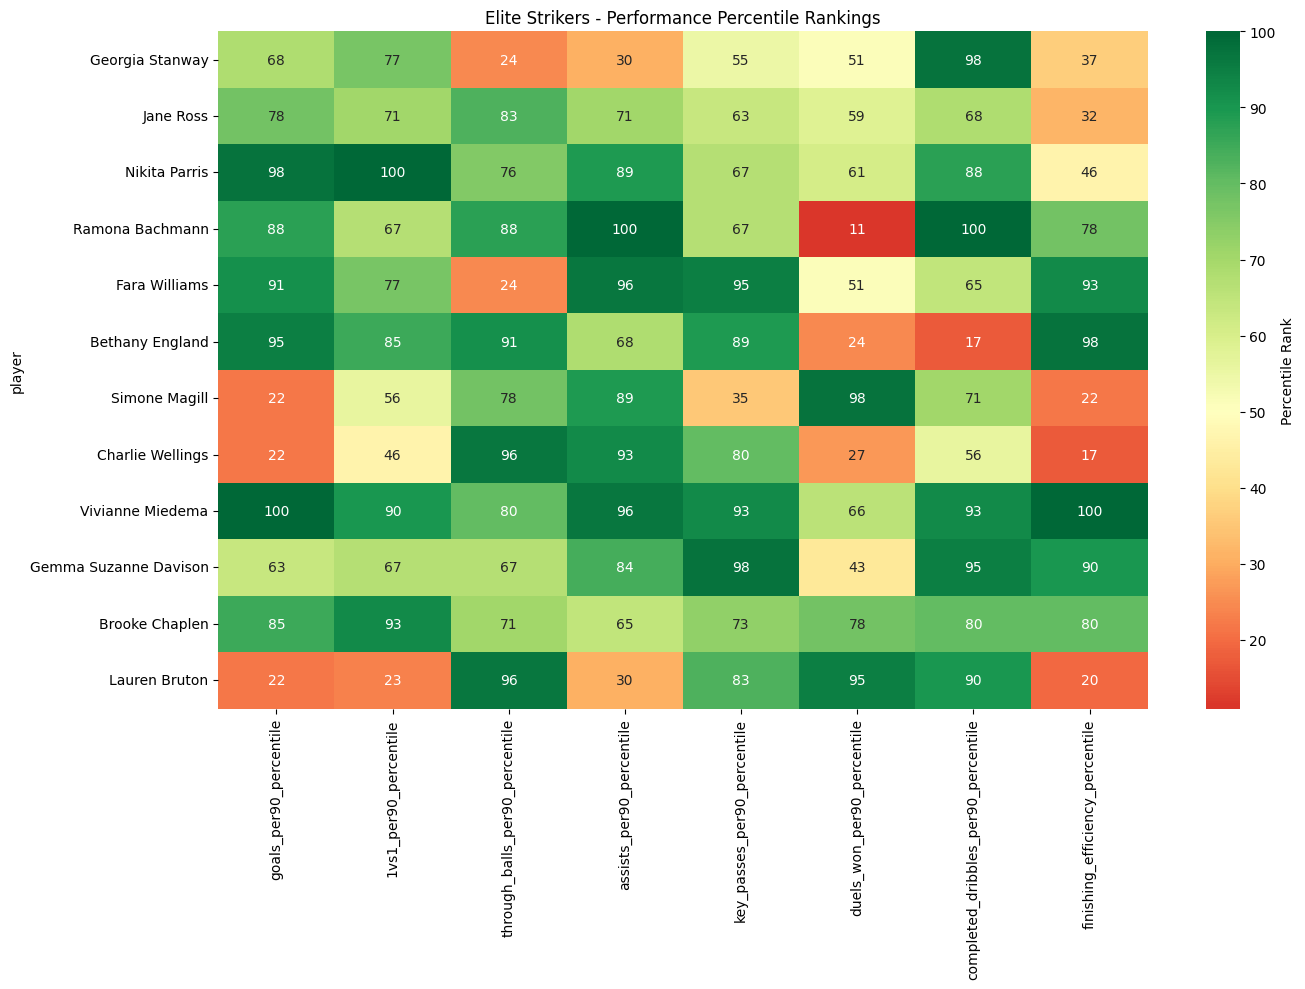

In [94]:
# Calculate percentiles for ALL clustering metrics
clustering_cols = ['goals_per90', '1vs1_per90', 'through_balls_per90', 'assists_per90', 
                  'key_passes_per90', 'duels_won_per90', 'completed_dribbles_per90', 
                  'finishing_efficiency']

for col in clustering_cols:
    final_df[f'{col}_percentile'] = final_df[col].rank(pct=True) * 100

# Then your heatmap code with all 8 metrics
high_potential = final_df[final_df['cluster'] == 1]
percentile_cols = [f'{col}_percentile' for col in clustering_cols]

plt.figure(figsize=(14, 10))
heatmap_data = high_potential.set_index('player')[percentile_cols]

sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', center=50, 
            fmt='.0f', cbar_kws={'label': 'Percentile Rank'})
plt.title('Elite Strikers - Performance Percentile Rankings')
plt.tight_layout()
plt.show()


In [105]:
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
import numpy as np

def create_individual_pizza_charts(final_df, cluster_id, max_players=8):
    """Create individual pizza charts for players in a specific cluster"""
    
    # Parameters for strikers (updated to match your clustering features)
    params = [
        "Goals\nper 90", "Finishing\nEfficiency", "1v1s\nper 90", "Through Balls\nper 90", 
        "Key Passes\nper 90", "Assists\nper 90", "Completed\nDribbles per 90", "Duels Won\nper 90"
    ]
    
    metric_cols = [
        'goals_per90', 'finishing_efficiency', '1vs1_per90', 'through_balls_per90',
        'key_passes_per90', 'assists_per90', 'completed_dribbles_per90', 'duels_won_per90'
    ]
    
    # Color scheme: 3 attacking, 4 creative, 1 physical
    slice_colors = ["#1A78CF"] * 3 + ["#FF9300"] * 4 + ["#D70232"] * 1
    text_colors = ["#F2F2F2"] * 8
    
    # Calculate percentiles
    for col in metric_cols:
        final_df[f'{col}_percentile'] = final_df[col].rank(pct=True) * 100
    
    # Get players from specified cluster
    cluster_players = final_df[final_df['cluster'] == cluster_id].head(max_players)
    
    print(f"Creating pizza charts for Cluster {cluster_id} ({len(cluster_players)} players)")
    
    # Create individual charts
    for idx, (_, player) in enumerate(cluster_players.iterrows()):
        
        # Get percentile values and round them
        values = [round(player[f'{metric}_percentile'], 0) for metric in metric_cols]
        
        # Create pizza chart
        baker = PyPizza(
            params=params,
            background_color="#222222",
            straight_line_color="#000000",
            straight_line_lw=1,
            last_circle_color="#000000",
            last_circle_lw=1,
            other_circle_lw=0,
            inner_circle_size=20
        )
        
        # Plot pizza
        fig, ax = baker.make_pizza(
            values,
            figsize=(10, 10),
            color_blank_space="same",
            slice_colors=slice_colors,
            value_colors=text_colors,
            value_bck_colors=slice_colors,
            blank_alpha=0.4,
            kwargs_slices=dict(edgecolor="#000000", zorder=2, linewidth=1),
            kwargs_params=dict(color="#F2F2F2", fontsize=11, va="center"),
            kwargs_values=dict(
                color="#000000", fontsize=10, zorder=3,
                bbox=dict(edgecolor="#000000", facecolor="white", boxstyle="round,pad=0.2", lw=1)
            )
        )
        
        # Add title
        fig.text(0.515, 0.975, f"{player['player']} - {player['team']}", 
                size=16, ha="center", weight='bold', color="#F2F2F2")
        
        # Add subtitle
        fig.text(0.515, 0.955, f"Cluster {cluster_id} - Percentile Rank vs All Strikers", 
                size=13, ha="center", color="#F2F2F2")
        
        # Add category labels
        fig.text(0.34, 0.93, "Attacking        Creative        Physical", 
                size=14, weight='bold', color="#F2F2F2")
        
        # Add colored rectangles for legend
        fig.patches.extend([
            plt.Rectangle((0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf", transform=fig.transFigure),
            plt.Rectangle((0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300", transform=fig.transFigure),
            plt.Rectangle((0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232", transform=fig.transFigure)
        ])
        
        plt.show()

### Players from cluster 0 (Players with potential)

Creating pizza charts for Cluster 0 (3 players)


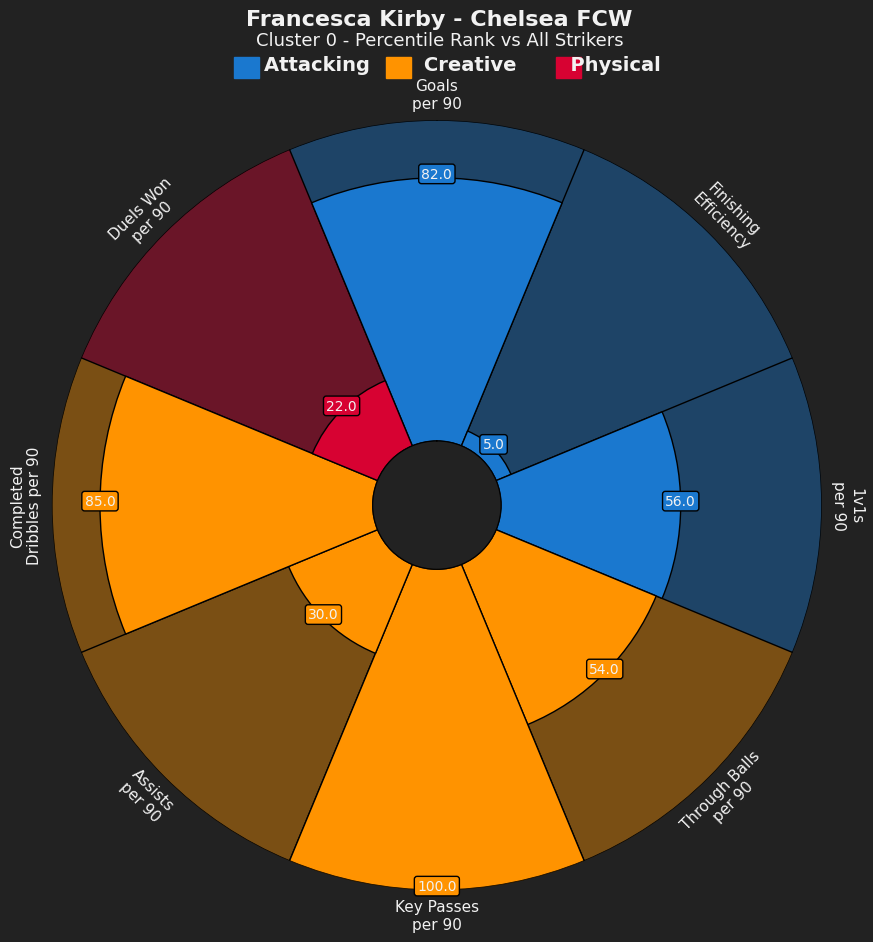

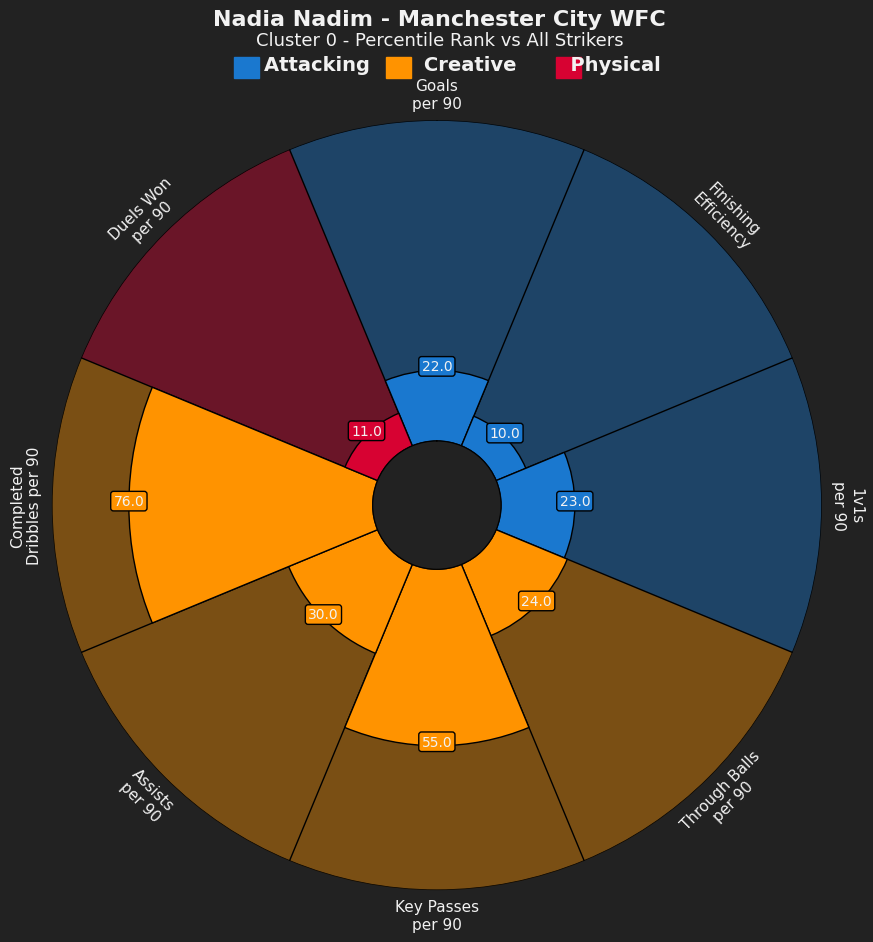

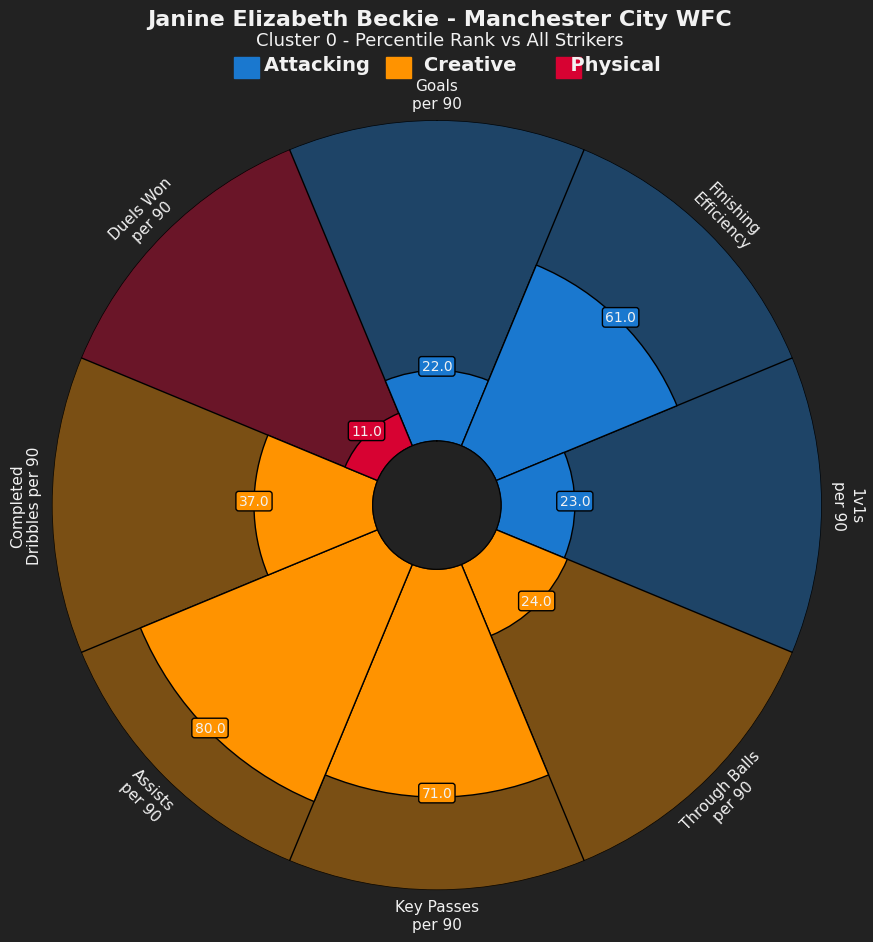

In [106]:
create_individual_pizza_charts(final_df, cluster_id=0, max_players=3)

## Players from Cluster 1 (Elite strikers)

Creating pizza charts for Cluster 1 (3 players)


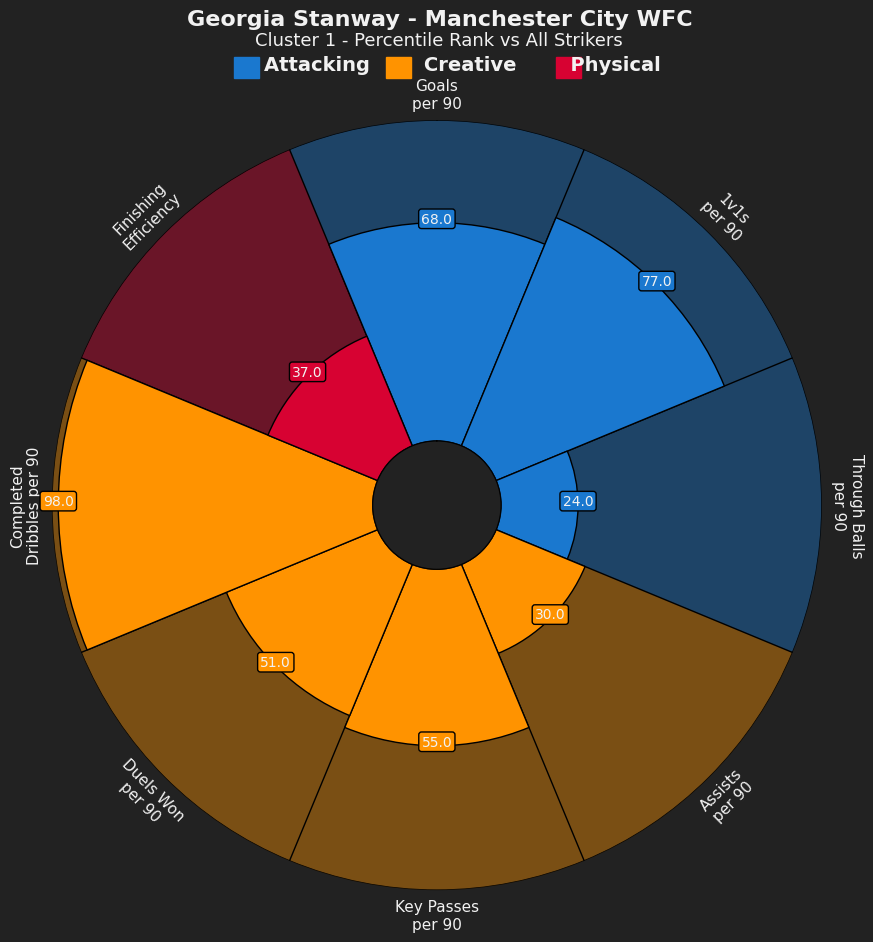

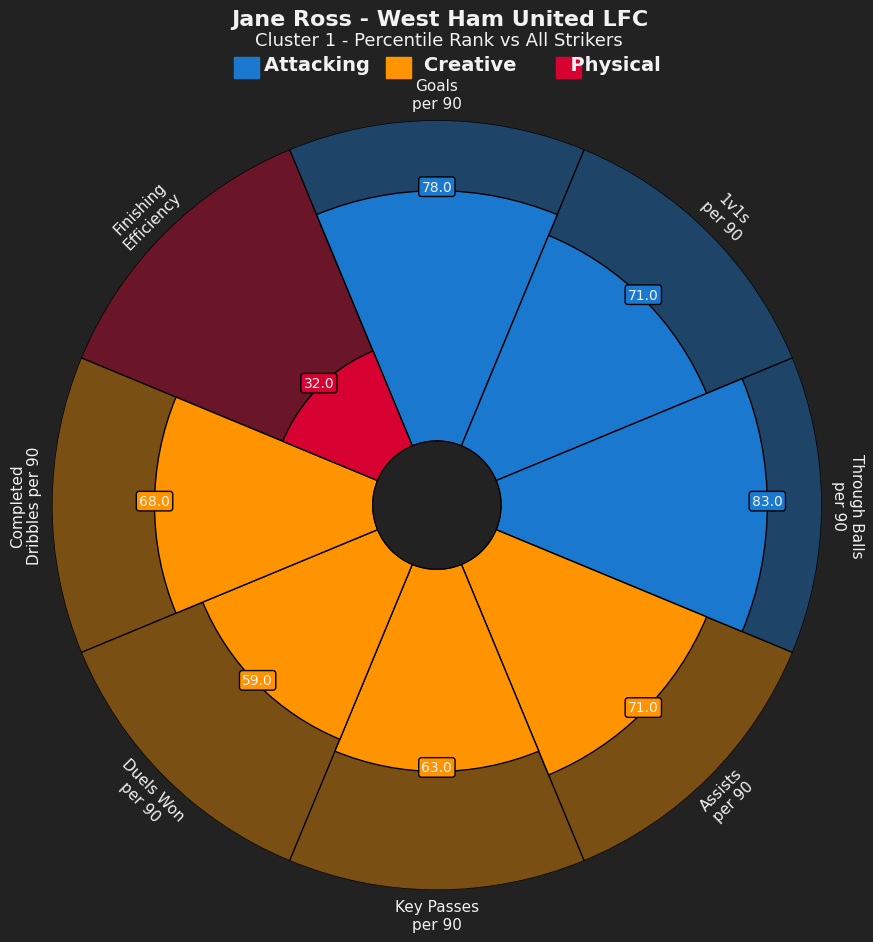

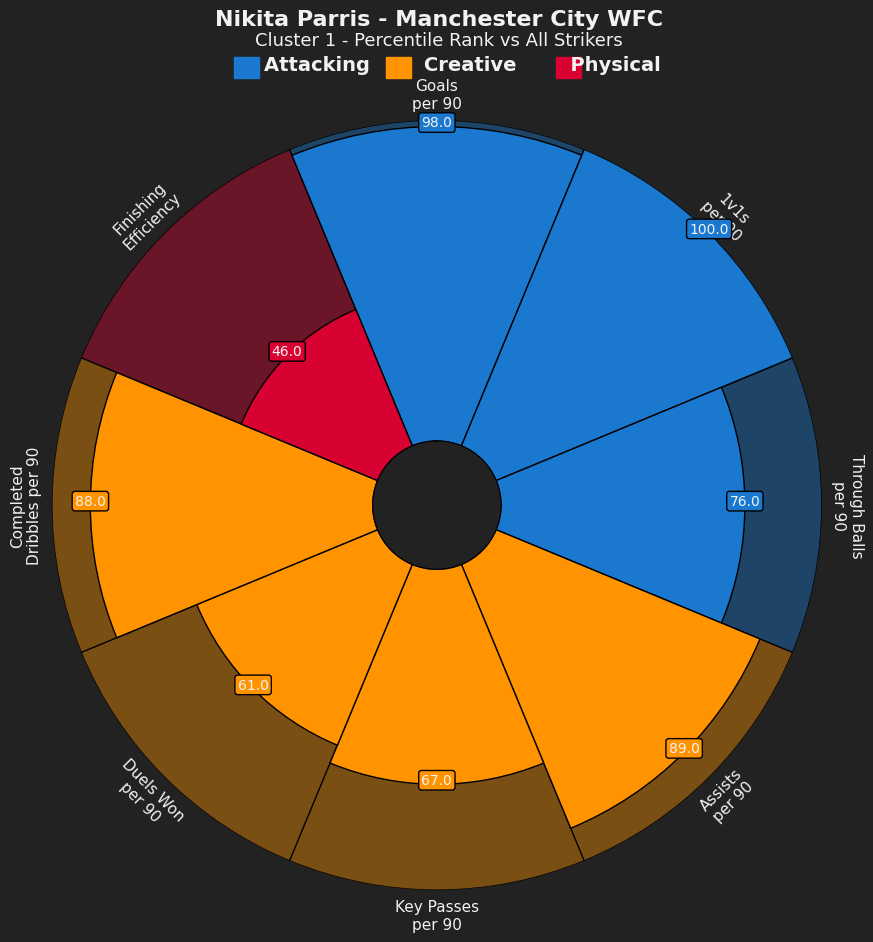

In [102]:
create_individual_pizza_charts(final_df, cluster_id=1, max_players=3)

Available players:
1: Francesca Kirby
2: Georgia Stanway
3: Nadia Nadim
4: Jane Ross
5: Nikita Parris
6: Ramona Bachmann
7: Janine Elizabeth Beckie
8: Ellen White
9: Fara Williams
10: Bethany England
11: Lauren Hemp
12: Emma Follis
13: Simone Magill
14: Charlie Wellings
15: Lucy Quinn
16: Claudia Walker
17: Ava Kuyken
18: Courtney Sweetman-Kirk
19: Rinsola Babajide
20: Leandra Little
21: Vivianne Miedema
22: Anne-Marie Heatherson
23: Olivia Fergusson
24: Gemma Suzanne Davison
25: Brooke Chaplen
26: Lauren Bruton
27: Iniabasi Anefiok Umotong
28: Heather Payne
29: Juliette Kemppi
30: Ellie Brazil
31: Kayleigh Green
32: Leanne Kiernan
33: Alisha Lehmann
34: Hannah Cain
35: Kirsty Linnett
36: Shannon Albuery
37: Pauline Bremer
38: Rosella Ayane
39: Elise Hughes
40: Erin Bloomfield
41: Abigail Harrison


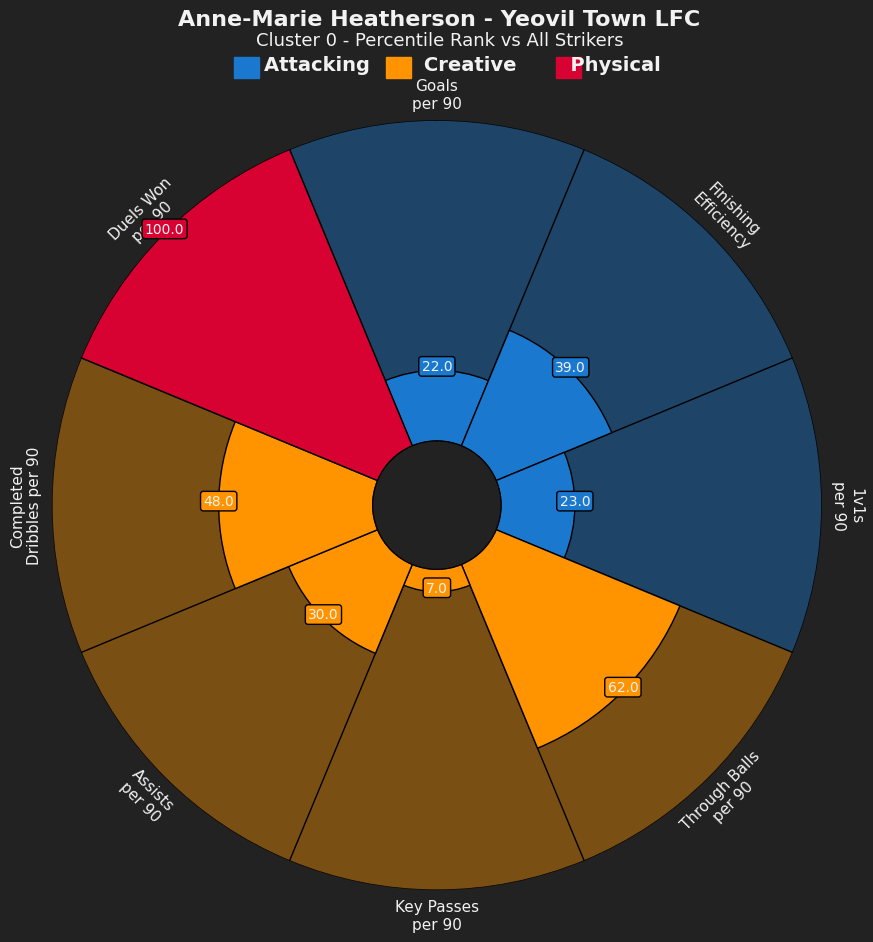

In [111]:
def player_pizza(final_df, player_name):
    """Create pizza chart for a specific player"""
    
    # Parameters reordered to match proper categories
    params = [
        "Goals\nper 90", "Finishing\nEfficiency", "1v1s\nper 90", "Through Balls\nper 90",
        "Key Passes\nper 90", "Assists\nper 90", "Completed\nDribbles per 90", "Duels Won\nper 90"
    ]
    
    metric_cols = [
        'goals_per90', 'finishing_efficiency', '1vs1_per90', 'through_balls_per90',
        'key_passes_per90', 'assists_per90', 'completed_dribbles_per90', 'duels_won_per90'
    ]
    
    # Calculate percentiles
    for col in metric_cols:
        final_df[f'{col}_percentile'] = final_df[col].rank(pct=True) * 100
    
    # Find the specific player
    player_row = final_df[final_df['player'] == player_name]
    
    if len(player_row) == 0:
        print(f"Player '{player_name}' not found!")
        print("Available players:")
        print(final_df['player'].tolist())
        return
    
    player = player_row.iloc[0]
    
    # Get percentile values and round them
    values = [round(player[f'{metric}_percentile'], 0) for metric in metric_cols]
    
    # Color scheme: 3 attacking, 4 creative, 1 physical
    slice_colors = ["#1A78CF"] * 3 + ["#FF9300"] * 4 + ["#D70232"] * 1
    text_colors = ["#F2F2F2"] * 8
    
    # Create pizza chart
    baker = PyPizza(
        params=params,
        background_color="#222222",
        straight_line_color="#000000",
        straight_line_lw=1,
        last_circle_color="#000000",
        last_circle_lw=1,
        other_circle_lw=0,
        inner_circle_size=20
    )
    
    # Plot pizza
    fig, ax = baker.make_pizza(
        values,
        figsize=(10, 10),
        color_blank_space="same",
        slice_colors=slice_colors,
        value_colors=text_colors,
        value_bck_colors=slice_colors,
        blank_alpha=0.4,
        kwargs_slices=dict(edgecolor="#000000", zorder=2, linewidth=1),
        kwargs_params=dict(color="#F2F2F2", fontsize=11, va="center"),
        kwargs_values=dict(
            color="#000000", fontsize=10, zorder=3,
            bbox=dict(edgecolor="#000000", facecolor="white", boxstyle="round,pad=0.2", lw=1)
        )
    )
    
    # Add title
    fig.text(0.515, 0.975, f"{player['player']} - {player['team']}", 
            size=16, ha="center", weight='bold', color="#F2F2F2")
    
    # Add subtitle
    fig.text(0.515, 0.955, f"Cluster {player['cluster']} - Percentile Rank vs All Strikers", 
            size=13, ha="center", color="#F2F2F2")
    
    # Add category labels
    fig.text(0.34, 0.93, "Attacking        Creative        Physical", 
            size=14, weight='bold', color="#F2F2F2")
    
    # Add colored rectangles for legend
    fig.patches.extend([
        plt.Rectangle((0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf", transform=fig.transFigure),
        plt.Rectangle((0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300", transform=fig.transFigure),
        plt.Rectangle((0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232", transform=fig.transFigure)
    ])
    
    plt.show()

def interactive_player_pizza():
    """Interactive function to create pizza chart for a specific player"""
    print("Available players:")
    for i, player in enumerate(final_df['player'].tolist(), 1):
        print(f"{i}: {player}")
    
    player_name = input("\nEnter player name: ")
    player_pizza(final_df, player_name)

# Usage:
interactive_player_pizza()